In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
import numpy as np
from itertools import product
from copy import deepcopy
import pickle

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)
from configs.config_class import Config

# Now you should be able to import
from interactions import ppo_interaction as ppo
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_config
# from configs.interaction_configs.ppo_interaction_configs import ppo_interaction_texasholdem_config
# from configs.ppo_configs import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.ppo_configs_dict import ppo_interaction_config_texas, texas_holdem_config, actor_configs_texas, critic_configs_texas
from configs.llm_configs import texas_holdem_llm_agent_configs
# from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

Now training: c, 0.05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 273.59it/s]


Now training: c, 0.15
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 362.86it/s]


Now training: c, 0.3
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 274.09it/s]


Now training: batch_size, 64
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 416.58it/s]


Now training: batch_size, 128
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 693.00it/s]


Now training: batch_size, 256
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 392.97it/s]


Now training: num_epochs, 4
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 488.62it/s]


Now training: num_epochs, 6
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 543.54it/s]


Now training: num_epochs, 8
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 314.16it/s]


Now training: update_frequency, 1000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 321.73it/s]


Now training: update_frequency, 4000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 357.17it/s]


Now training: update_frequency, 7000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 323.65it/s]


Now training: learning_rate_actor, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 534.05it/s]


Now training: learning_rate_actor, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 539.02it/s]


Now training: learning_rate_actor, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 416.42it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 608.59it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 713.78it/s]


Now training: learning_rate_critic, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 406.71it/s]


Now training: learning_rate_critic, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 326.65it/s]


Now training: learning_rate_critic, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 625.03it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 714.34it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 540.38it/s]


{'c:0.05': [np.float64(0.5), np.float64(-0.5), np.float64(2.0), np.float64(1.0), np.float64(-4.0), np.float64(8.0), np.float64(-0.5)], 'c:0.15': [np.float64(0.5), np.float64(-0.5), np.float64(0.5), np.float64(1.0), np.float64(-1.0), np.float64(0.5), np.float64(-2.0)], 'c:0.3': [np.float64(3.0), np.float64(-3.0), np.float64(0.5), np.float64(-1.0), np.float64(-0.5), np.float64(0.5), np.float64(1.0)], 'batch_size:64': [np.float64(-3.0), np.float64(-0.5), np.float64(2.0), np.float64(-1.0), np.float64(1.0), np.float64(-3.0), np.float64(0.5)], 'batch_size:128': [np.float64(-0.5), np.float64(-1.0), np.float64(-9.0), np.float64(0.5), np.float64(-2.0), np.float64(-1.0), np.float64(1.0)], 'batch_size:256': [np.float64(0.5), np.float64(0.5), np.float64(1.0), np.float64(0.5), np.float64(-1.0), np.float64(1.0), np.float64(0.5)], 'num_epochs:4': [np.float64(3.0), np.float64(0.5), np.float64(2.0), np.float64(0.5), np.float64(-0.5), np.float64(-1.0), np.float64(-0.5)], 'num_epochs:6': [np.float64(0.5)

In [3]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores1.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores1.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

Now training: c, 0.05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 555.55it/s]


Now training: c, 0.15
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 492.13it/s]


Now training: c, 0.3
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 565.03it/s]


Now training: batch_size, 64
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 540.56it/s]


Now training: batch_size, 128
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 544.05it/s]


Now training: batch_size, 256
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 454.59it/s]


Now training: num_epochs, 4
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 384.73it/s]


Now training: num_epochs, 6
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 267.69it/s]


Now training: num_epochs, 8
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 247.02it/s]


Now training: update_frequency, 1000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 808.65it/s]


Now training: update_frequency, 4000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 500.01it/s]


Now training: update_frequency, 7000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 624.80it/s]


Now training: learning_rate_actor, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 544.11it/s]


Now training: learning_rate_actor, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 487.40it/s]


Now training: learning_rate_actor, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 767.93it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 810.21it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 543.01it/s]


Now training: learning_rate_critic, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 714.51it/s]


Now training: learning_rate_critic, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 499.89it/s]


Now training: learning_rate_critic, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 386.61it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 694.19it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 378.92it/s]

{'c:0.05': [np.float64(0.5), np.float64(1.0), np.float64(-1.0), np.float64(-2.0), np.float64(0.5), np.float64(1.0), np.float64(-1.0)], 'c:0.15': [np.float64(-2.0), np.float64(4.0), np.float64(1.0), np.float64(1.0), np.float64(-0.5), np.float64(-3.0), np.float64(-1.0)], 'c:0.3': [np.float64(-0.5), np.float64(-0.5), np.float64(-0.5), np.float64(-1.0), np.float64(-2.0), np.float64(6.0), np.float64(2.0)], 'batch_size:64': [np.float64(1.0), np.float64(0.5), np.float64(-1.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(1.0)], 'batch_size:128': [np.float64(-0.5), np.float64(-1.0), np.float64(0.5), np.float64(1.0), np.float64(-0.5), np.float64(-0.5), np.float64(-1.0)], 'batch_size:256': [np.float64(1.0), np.float64(-3.0), np.float64(-3.0), np.float64(-3.0), np.float64(2.0), np.float64(2.0), np.float64(-1.0)], 'num_epochs:4': [np.float64(-1.0), np.float64(1.0), np.float64(4.0), np.float64(-0.5), np.float64(-2.0), np.float64(1.0), np.float64(-0.5)], 'num_epochs:6': [np.float64(

In [4]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores3.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores3.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

Now training: c, 0.05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 544.21it/s]


Now training: c, 0.15
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 489.93it/s]


Now training: c, 0.3
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 814.30it/s]


Now training: batch_size, 64
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 297.15it/s]


Now training: batch_size, 128
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 323.49it/s]


Now training: batch_size, 256
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 500.02it/s]


Now training: num_epochs, 4
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 961.95it/s]


Now training: num_epochs, 6
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 610.03it/s]


Now training: num_epochs, 8
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 649.21it/s]


Now training: update_frequency, 1000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 609.23it/s]


Now training: update_frequency, 4000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 608.13it/s]


Now training: update_frequency, 7000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 768.75it/s]


Now training: learning_rate_actor, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 612.11it/s]


Now training: learning_rate_actor, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 409.28it/s]


Now training: learning_rate_actor, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 544.66it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 409.51it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 270.78it/s]


Now training: learning_rate_critic, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 500.13it/s]


Now training: learning_rate_critic, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 425.19it/s]


Now training: learning_rate_critic, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 609.89it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 445.77it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 378.57it/s]

{'c:0.05': [np.float64(1.0), np.float64(-0.5), np.float64(3.0), np.float64(-0.5), np.float64(-2.0), np.float64(-0.5), np.float64(-1.0)], 'c:0.15': [np.float64(-4.0), np.float64(-0.5), np.float64(4.0), np.float64(1.0), np.float64(0.5), np.float64(1.0), np.float64(1.0)], 'c:0.3': [np.float64(0.5), np.float64(-1.0), np.float64(0.5), np.float64(2.0), np.float64(-1.0), np.float64(0.5), np.float64(-0.5)], 'batch_size:64': [np.float64(-1.0), np.float64(-7.0), np.float64(-5.0), np.float64(-1.0), np.float64(1.0), np.float64(-2.0), np.float64(0.5)], 'batch_size:128': [np.float64(-0.5), np.float64(-0.5), np.float64(-1.0), np.float64(-3.0), np.float64(-1.0), np.float64(4.0), np.float64(-0.5)], 'batch_size:256': [np.float64(1.0), np.float64(-1.0), np.float64(0.5), np.float64(7.0), np.float64(3.0), np.float64(1.0), np.float64(-1.0)], 'num_epochs:4': [np.float64(-5.0), np.float64(0.5), np.float64(-1.0), np.float64(1.0), np.float64(-2.0), np.float64(0.5), np.float64(0.5)], 'num_epochs:6': [np.float64(

In [5]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores4.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores4.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

Now training: c, 0.05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 543.43it/s]


Now training: c, 0.15
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 625.10it/s]


Now training: c, 0.3
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 294.20it/s]


Now training: batch_size, 64
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 267.17it/s]


Now training: batch_size, 128
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 693.66it/s]


Now training: batch_size, 256
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 408.57it/s]


Now training: num_epochs, 4
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 444.93it/s]


Now training: num_epochs, 6
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 802.71it/s]


Now training: num_epochs, 8
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 328.64it/s]


Now training: update_frequency, 1000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 541.20it/s]


Now training: update_frequency, 4000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 802.22it/s]


Now training: update_frequency, 7000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 446.19it/s]


Now training: learning_rate_actor, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 357.14it/s]


Now training: learning_rate_actor, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 357.03it/s]


Now training: learning_rate_actor, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 500.01it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 384.50it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 454.20it/s]


Now training: learning_rate_critic, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 333.33it/s]


Now training: learning_rate_critic, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 454.69it/s]


Now training: learning_rate_critic, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 624.93it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 384.64it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 384.48it/s]


{'c:0.05': [np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(2.0), np.float64(-0.5), np.float64(-1.0), np.float64(-0.5)], 'c:0.15': [np.float64(-0.5), np.float64(-1.0), np.float64(-0.5), np.float64(-1.0), np.float64(-0.5), np.float64(2.0), np.float64(3.0)], 'c:0.3': [np.float64(0.5), np.float64(-3.0), np.float64(0.5), np.float64(-0.5), np.float64(1.0), np.float64(-0.5), np.float64(-4.0)], 'batch_size:64': [np.float64(-11.0), np.float64(-2.0), np.float64(-0.5), np.float64(-1.0), np.float64(0.5), np.float64(-0.5), np.float64(-5.0)], 'batch_size:128': [np.float64(0.5), np.float64(-0.5), np.float64(-0.5), np.float64(1.0), np.float64(-0.5), np.float64(-3.0), np.float64(-2.0)], 'batch_size:256': [np.float64(-1.0), np.float64(1.0), np.float64(2.0), np.float64(1.0), np.float64(-0.5), np.float64(-8.0), np.float64(-3.0)], 'num_epochs:4': [np.float64(-4.0), np.float64(-0.5), np.float64(-1.0), np.float64(4.0), np.float64(-0.5), np.float64(-0.5), np.float64(-4.0)], 'num_epochs:6': [np

In [6]:

base_cfg = ppo_interaction_config_texas
base_actor = actor_configs_texas
base_critic = critic_configs_texas

param_dict_cfg = {
"c" : [0.05, 0.15, 0.3],
"batch_size" : [64, 128, 256],
"num_epochs" : [4,6,8],
"update_frequency" : [1000,4000,7000],
}

param_dict_actor = {
	"learning_rate_actor" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

param_dict_critic = {
	"learning_rate_critic" : [3e-5, 3e-4, 1e-3],
	"hidden_layer" : [[256, 256], [128,128]],
}

train_scores_total = {}
test_scores_total = {}

def update_scores(param, value, train_score, test_score):
    train_scores_total[f"{param}:{str(value)}"] = train_score
    test_scores_total[f"{param}:{str(value)}"] = test_score


for param in param_dict_cfg:
	for value in param_dict_cfg[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(base_cfg)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(cfg),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)

for param in param_dict_actor:
	for value in param_dict_actor[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(actor_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(cfg),
													critic_configs=Config(critic_configs_texas),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


for param in param_dict_critic:
	for value in param_dict_critic[param]:
		print(f"Now training: {param}, {value}")
		cfg = deepcopy(critic_configs_texas)
		cfg[param] = value
		print(Config(cfg))
		ppo_temp = ppo.PPO_interaction(interaction_configs=Config(ppo_interaction_config_texas),
													env_configs=Config(texas_holdem_config),
													actor_configs=Config(actor_configs_texas),
													critic_configs=Config(cfg),
                      llm_configs=texas_holdem_llm_agent_configs)
		train_scores, trained_agents = ppo_temp.train_multiagent()
		test_scores = ppo_temp.test_multiagent(trained_agents)
		update_scores(param, value, train_scores, test_scores)


print(train_scores_total)
print(test_scores_total)

with open("train_scores.pkl", "wb") as f:       # save
    pickle.dump(train_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("test_scores.pkl", "wb") as f:       # save
    pickle.dump(test_scores_total, f, protocol=pickle.HIGHEST_PROTOCOL)

Now training: c, 0.05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 294.12it/s]


Now training: c, 0.15
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 357.18it/s]


Now training: c, 0.3
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 333.15it/s]


Now training: batch_size, 64
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 277.91it/s]


Now training: batch_size, 128
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 356.66it/s]


Now training: batch_size, 256
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 312.49it/s]


Now training: num_epochs, 4
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 399.61it/s]


Now training: num_epochs, 6
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 238.11it/s]


Now training: num_epochs, 8
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 232.31it/s]


Now training: update_frequency, 1000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 1000.55it/s]


Now training: update_frequency, 4000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 625.12it/s]


Now training: update_frequency, 7000
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 454.57it/s]


Now training: learning_rate_actor, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 714.19it/s]


Now training: learning_rate_actor, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 714.26it/s]


Now training: learning_rate_actor, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 454.45it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 333.44it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 624.69it/s]


Now training: learning_rate_critic, 3e-05
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 555.60it/s]


Now training: learning_rate_critic, 0.0003
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 1000.79it/s]


Now training: learning_rate_critic, 0.001
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 624.90it/s]


Now training: hidden_layer, [256, 256]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 499.98it/s]


Now training: hidden_layer, [128, 128]
🖥  Using device: cpu
self obs size: 76


100%|██████████| 5/5 [00:00<00:00, 454.81it/s]

{'c:0.05': [np.float64(1.0), np.float64(0.5), np.float64(-1.0), np.float64(0.5), np.float64(3.0), np.float64(2.0), np.float64(1.0)], 'c:0.15': [np.float64(-1.0), np.float64(2.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.5), np.float64(1.0)], 'c:0.3': [np.float64(-1.0), np.float64(-1.0), np.float64(-1.0), np.float64(3.0), np.float64(-4.0), np.float64(1.0), np.float64(-0.5)], 'batch_size:64': [np.float64(5.0), np.float64(0.5), np.float64(-1.0), np.float64(1.0), np.float64(1.0), np.float64(0.5), np.float64(-5.0)], 'batch_size:128': [np.float64(-1.0), np.float64(-2.0), np.float64(2.0), np.float64(0.5), np.float64(1.0), np.float64(-3.0), np.float64(-1.0)], 'batch_size:256': [np.float64(-0.5), np.float64(0.5), np.float64(5.0), np.float64(-1.0), np.float64(1.0), np.float64(-0.5), np.float64(3.0)], 'num_epochs:4': [np.float64(-0.5), np.float64(-1.0), np.float64(1.0), np.float64(1.0), np.float64(-2.0), np.float64(1.0), np.float64(-2.0)], 'num_epochs:6': [np.float64(-1.0),

In [ ]:
tests = [r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores1.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores3.pkl",
         r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\test_scores4.pkl",
         ]
trains = [r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores.pkl",
          r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores1.pkl",
          r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores3.pkl",
          r"C:\Users\achen\Dropbox\code\LLM-RL-Pruning\notebooks\train_scores4.pkl",
          ]

test_arr = []
trains_arr = []

test_final = {}
trains_final = {}
for i in tests:
	with open(i, "rb") as f:       # load
		test_scores = pickle.load(f)

		test_arr.append(test_scores)

for test in test_arr:
	for param in test:
		if param in test_final:
			test_final[param].append(test[param])
		else:
			test_final[param] = [test[param]]

print(test_final)
for key in test_final:
    test_final[key] = np.vstack(test_final[key])
    test_final[key] = np.mean(test_final[key], axis = 0)
print(test_final)


for i in trains:
	with open(i, "rb") as f:       # load
		train_scores = pickle.load(f)
		trains_arr.append(train_scores)

for train in trains_arr:
	for param in train:
		if param in trains_final:
			trains_final[param].append(train[param])
		else:
			trains_final[param] = [train[param]]

print(trains_final)
for key in trains_final:
    trains_final[key] = np.vstack(trains_final[key])
    trains_final[key] = np.mean(trains_final[key], axis = 0)

print(trains_final)


{'c:0.05': [[np.float64(1.0), np.float64(-0.5), np.float64(-3.0), np.float64(-1.0), np.float64(0.5)], [np.float64(3.0), np.float64(-0.5), np.float64(-2.0), np.float64(2.0), np.float64(-5.0)]], 'c:0.15': [[np.float64(-7.0), np.float64(4.0), np.float64(-0.5), np.float64(-1.0), np.float64(1.0)], [np.float64(6.0), np.float64(2.0), np.float64(0.5), np.float64(0.5), np.float64(-2.0)]], 'c:0.3': [[np.float64(-0.5), np.float64(-4.0), np.float64(-1.0), np.float64(-1.0), np.float64(2.0)], [np.float64(1.0), np.float64(1.0), np.float64(-0.5), np.float64(0.5), np.float64(-1.0)]], 'batch_size:64': [[np.float64(-1.0), np.float64(2.0), np.float64(1.0), np.float64(-2.0), np.float64(2.0)], [np.float64(1.0), np.float64(0.5), np.float64(-3.0), np.float64(1.0), np.float64(6.0)]], 'batch_size:128': [[np.float64(0.5), np.float64(-1.0), np.float64(5.0), np.float64(0.5), np.float64(-2.0)], [np.float64(0.5), np.float64(2.0), np.float64(1.0), np.float64(-1.0), np.float64(0.5)]], 'batch_size:256': [[np.float64(-0

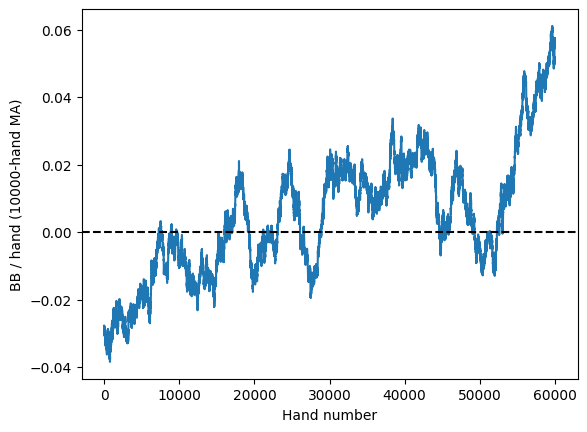

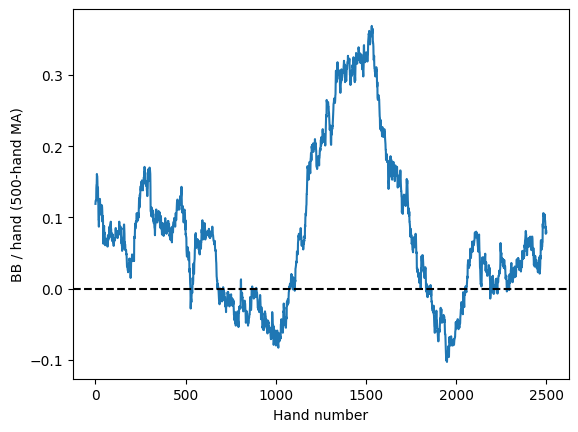

In [39]:
import matplotlib.pyplot as plt

window = 10000
rolling = np.convolve(train_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()

window = 500
rolling = np.convolve(test_scores,
                      np.ones(window)/window, mode='valid')
plt.plot(rolling)
plt.axhline(0,color='k',ls='--')
plt.ylabel('BB / hand ({}-hand MA)'.format(window))
plt.xlabel('Hand number')
plt.show()


# fig, (ax1, ax2)  = plt.subplots(1, 2)
# ax1.set_title("Training Scores")
# ax1.set_xlabel("Episodes")
# ax1.set_ylabel("Score")
# ax1.plot(train_scores)
# ax1.grid(True)

# ax2.set_title("Testing Scores")
# ax2.set_xlabel("Episodes")
# ax2.set_ylabel("Score")
# ax2.plot(test_scores)
# ax2.grid(True)

# plt.tight_layout()

# plt.show()


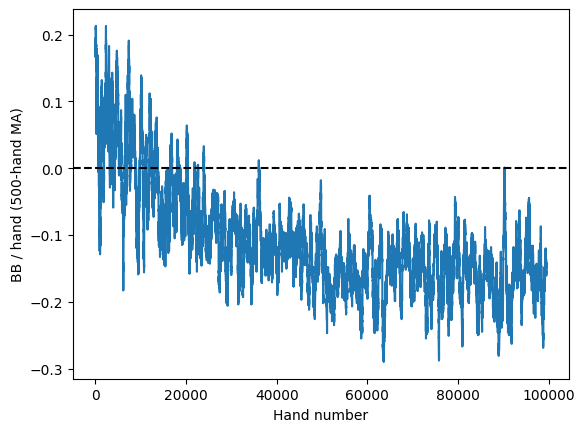

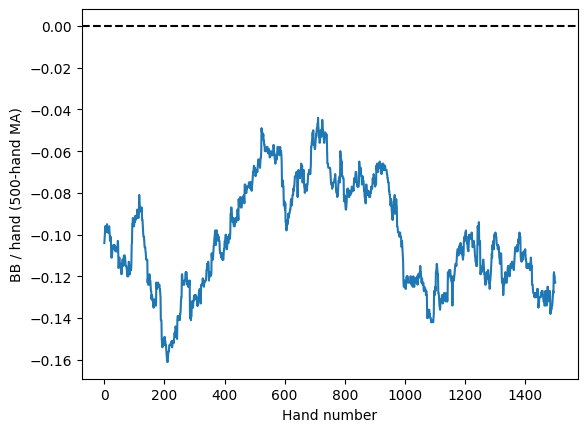

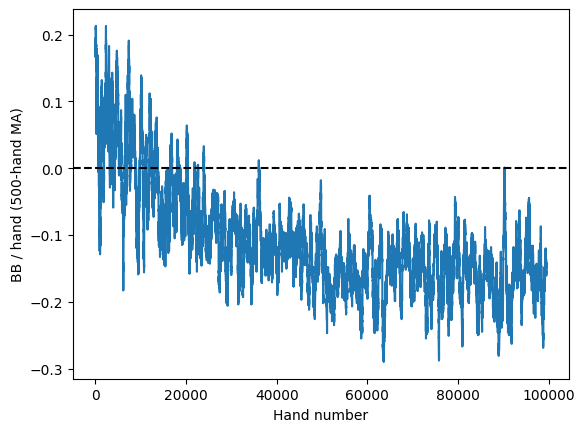

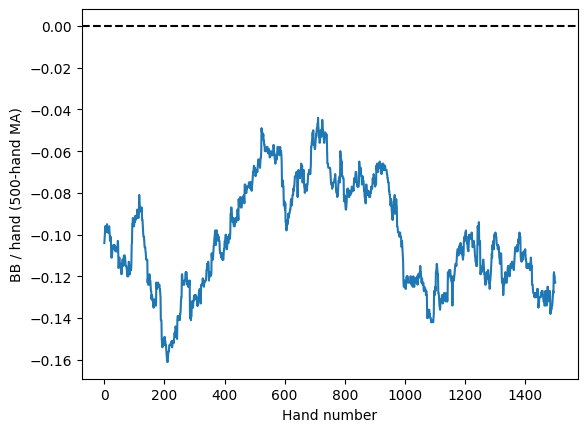

## PPO Example: LunarLander

In [ ]:
ppo_interaction = ppo.PPO_interaction(interaction_config=ppo_interaction_config,
                      actor_configs = actor_configs,
                      critic_configs = critic_configs
                  )

train_scores, trained_agents = ppo_interaction.train()

In [ ]:
test_scores = ppo_interaction.test()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)

plt.tight_layout()

plt.show()

